### CSCN8000-25S-Sec1-Artificial Intelligence Algorithms and Mathematics
### Mid-Term Part B

| Student Name  | Student ID |
|---------------|------------|
| Haysam Elamin | 8953681    |

---

### Part 1

**Objective:**  
Use wine dataset from sklearn.datasets to classify wines into 3 categories. Load the dataset and split it into test and train. Train the model using Gaussian and Multinominal classifiers and post which model performs better. Use the trained model to perform some predictions on test data.



In [1]:
# importing the necessary Dependencies
from sklearn.datasets import load_wine   # This loads the wine dataset
import pandas as pd                      
import numpy as np                       
from sklearn.model_selection import train_test_split   
from sklearn.naive_bayes import GaussianNB, MultinomialNB      
from sklearn.metrics import accuracy_score      
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris               # To load the iris dataset
from sklearn.linear_model import LogisticRegression  # The classification model
from sklearn.model_selection import cross_val_score  # For cross-validation scoring

#### 1- Loading the Data and Creating the Dataframe  

In [ ]:
# Load the wine dataset
wine_obj = load_wine()
# Create the DataFrame from the feature data
df1 = pd.DataFrame(wine_obj.data, columns=wine_obj.feature_names)

# Add the target column directly
df1['target'] = wine_obj.target

NameError: name 'wine' is not defined

### 2-  Exploratory Data Analysis EDA
- To examining a dataset 
- Using sklearn's built-in wine dataset for this classification task.
- This dataset contains features like alcohol content, ash, flavanoids, etc.

In [ ]:
#  Display the first few rows of the DataFrame
# ---------------------------------------------------
print("First 7 rows of the Wine dataset:")
print(df1.head())


First 7 rows of the Wine dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wi

In [ ]:
#  View basic info and class distribution
print("\nDataset Info:")
print(df1.info())
print("\nTarget class distribution:")
print(df1['target'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    flo

### 3-  Split the data into training and testing sets

In [ ]:

# Separate features (X) and target (y)
X = df1.drop('target', axis=1)  # All columns except 'target'
y = df1['target']               # Only the 'target' column

# Split the data into training and testing sets
# test_size=0.2 means 20% test data, 80% training
# random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Check the shape of the splits
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (142, 13)
Test shape: (36, 13)


### 4- Train the Models using the same data 

In [ ]:

# Initialize the models with _model suffix
gnb_model = GaussianNB()
mnb_model = MultinomialNB()

# Train the Gaussian Naive Bayes model
gnb_model.fit(X_train, y_train)

# Train the Multinomial Naive Bayes model
mnb_model.fit(X_train, y_train)

MultinomialNB()

### 5- Make Predictions and Evaluate 

In [ ]:
# Predict on the test set
y_pred_gnb = gnb_model.predict(X_test)
y_pred_mnb = mnb_model.predict(X_test)

# Evaluate accuracy
acc_gnb = accuracy_score(y_test, y_pred_gnb)
acc_mnb = accuracy_score(y_test, y_pred_mnb)

print(f"GaussianNB Accuracy: {acc_gnb:.2f}")
print(f"MultinomialNB Accuracy: {acc_mnb:.2f}")

GaussianNB Accuracy: 0.97
MultinomialNB Accuracy: 0.89


### 6- Plot Model Accuracies 

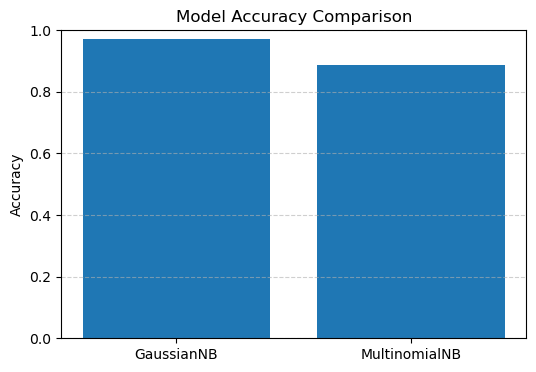

In [ ]:
# Model names and accuracies
model_names = ['GaussianNB', 'MultinomialNB']
accuracies = [acc_gnb, acc_mnb]

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(model_names, accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### 7- Observations & Reflections
We used the wine dataset from sklearn.datasets to classify wines into three categories based on features like alcohol content, flavanoids. We trained two models Gaussian Naive Bayes and Multinomial Naive Bayes.

Gaussian performed better than Multinomial in terms of accuracy.

As we know from class, Gaussian is designed for continuous numerical data, which matches the wine dataset features well. And Multinomial gave lower accuracy becuse it is more suitable categorical features.

**In conclusion :**
Choosing the right algorithm for the data type is crucial for good model performance.


# Part 2

**Objective:**

Use the iris flower dataset from the sklearn library and evaluate the Logistic Regression model using cross_val_score.

### 1- Loading the Data and Creating the DataFrame


In [ ]:
# Load the iris dataset
iris_obj = load_iris()

# Create DataFrame from feature data
df2 = pd.DataFrame(iris_obj.data, columns=iris_obj.feature_names)

# Add the target column
df2['target'] = iris_obj.target

### 2- Exploratory Data Analysis (EDA)
This dataset has 3 classes of Iris flowers: Setosa, Versicolor, Virginica.

Features include sepal and petal length and width.

In [ ]:
# Show first 7 rows
print("First 7 rows of the Iris dataset:")
print(df2.head(7))

# Show structure and summary
print("\nDataset Info:")
print(df2.info())

# Show class distribution
print("\nTarget class distribution:")
print(df2['target'].value_counts())


First 7 rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)

### 3- Model Training and Evaluation with Cross-Validation

In [ ]:
# Separate features and target
X2 = df2.drop('target', axis=1)
y2 = df2['target']

# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=200)  # Increased iterations to ensure convergence

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logreg_model, X2, y2, cv=5)

# Show all 5 scores
print("Cross-validation scores for each fold:")
print(cv_scores)

# Calculate and print mean accuracy
mean_accuracy = np.mean(cv_scores)
print(f"\nMean CV Accuracy: {mean_accuracy:.2f}")


Cross-validation scores for each fold:
[0.96666667 1.         0.93333333 0.96666667 1.        ]

Mean CV Accuracy: 0.97


### 4- Plotting Cross-Validation Scores

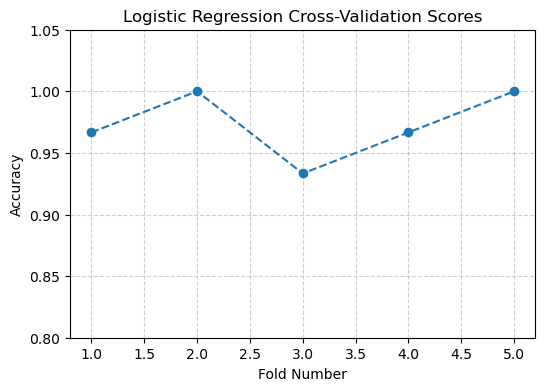

In [ ]:
# Plotting the fold-wise accuracy
plt.figure(figsize=(6, 4))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--')
plt.title('Logistic Regression Cross-Validation Scores')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 5- Observations & Reflections
We used the Iris dataset to classify flowers into three categories. We applied Logistic Regression and evaluated its performance using 5-fold cross-validation.

The average accuracy across folds was high, demonstrating that Logistic Regression is effective for this well-balanced, linearly-separable dataset.

In conclusion:

Logistic Regression performs well on small, clean, and well-separated datasets like Iris.

Cross-validation helps assess how well the model generalizes to unseen data.
